<a href="https://colab.research.google.com/github/tarboledah/SyS/blob/main/Parcial3/Parcial3_punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Punto 1 (2.5 puntos)

Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):


![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

Luego, encuentre el sistema equivalente a partir de un circuito RLC (entrada de tension - salida tension del capacitor).

Finalmente, desde el modelado desarrollado, presente un
dashboard que permita simular el sistema como subamortiguado, con amortiguamiento crıtico, sobreamortiguado, oscilatorio e inestable. El usuario podra determinar el valor del
factor de amortiguamiento y la simulacion debera determinar los valores de m, k y c y sus equivalentes R, L y C; ademas de estimar el tipo de amortiguamiento. Asimismo,debera presentar las graficas de polos y ceros, diagrama de Bode, respuesta impulso y respuesta al escalon. Nota: Para las graficas de Bode, respuesta impulso y respuesta al escalon, se sugiere utilizar la API de control de Sympy, a partir de los cuadernos guıa: Pendulo elastico y SLIT y fracciones parciales.


# Solución

El sistema masa, resorte y amortiguador se puede modelar a partir de la conservación de fuerzas:

$$
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
$$

donde :

$F_\text{S}(t) = k y(t)$

$F_\text{F}(t) = c \frac{d y(t)}{dt}$

$F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}$.

Por consiguiente:

$$ m\frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t) = x(t)$$

Aplicando la transformada de Laplace $\mathfrak{L}\left\{\frac{d^nx(t)}{dt}\right\}=s^nX(s)$, tenemos que:

$$ms^2Y(s)+csY(s)+kY(s)=X(s)$$

Asi:

$$\boxed{H(s) = \frac{Y(s)}{X(s)}=\frac{1}{ms^2+cs+k}}$$

Despues, nuestro circuito equivalente seria:

![Red equivalente en el dominio de Laplace](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/lowpass_laplace_domain.png?raw=1)

Ahora, para el circuito eléctrico presentado, y utilizando impedancias transformadas, tenemos que:

$$V_i(s) = V_R(s) + V_L(s) + V_C(s)$$

$$V_i(s) = I(s) (R) + I(s) (Ls) + I(s) (\frac{1}{cs})$$

Sabemos que que la salida del circuito es.

$$V_o = V_C(s) = I(s) (\frac{1}{cs})$$

Despejando $I_1(s)$ respecto a $I_2(s)$:

Ahora, la  funcion de transferencia seria:

$$H (s) = \frac{V_o}{V_i} = \frac{I(s) \frac{1}{cs}}{I(s) (R) + I(s) Ls + I(s) \frac{1}{cs}}$$

Factorizamos el denominador de la funcion:

$$H (s) = \frac{I(s) \frac{1}{cs}}{I(s) R + Ls + \frac{1}{cs}}$$

Multiplicamos por $Cs$ el numerador y denominador de la funcion y la funcion queda:


$$\boxed{H(s) = \frac{1}{ LCs^2 + CRs + 1}}$$

Revisando la equivalancia entre sistemas desde las Ecuaciones Diferenciales Ordinarias, tenemos que:

|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
                            |
|                         | $LC$                              | $m$                                     |
|                         | $CR$                              | $c$                                     |
|                         | $1$                    | $k$                           |


In [ ]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Teniendo en cuenta la forma canónica:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [ ]:
# forma canónica del slit
a2 = m # CL en circuito equivalente
a1 = c # L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

**1. Sistema con Amortiguamiento Crítico:**
Para un sistema con amortiguamiento crítico:
$$\xi = 1$$

$$\frac{a_1}{2\sqrt{a_0 a_2}}=1$$

$$\frac{c}{2\sqrt{k m}}=1$$

Asumimos:

$$c=2 = \frac{L}{R}$$

L=2 ,  R=1

$$k=1$$

$$m=4 = CL$$

$C=2$

$$\xi = \frac{2}{2}=1$$

**2. Sistema Subamortiguado:**
Para un sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{a_1}{2\sqrt{a_0 a_2}}<1$$

$$0<\frac{c}{2\sqrt{k m}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{1}{4}=0.25$$


**3. Sistema Sobreamortiguado:**
Para un sistema subamortiguadoo:

$$\xi>1$$

$$\frac{a_1}{2\sqrt{a_0 a_2}}>1$$

$$\frac{c}{2\sqrt{k m}}>1$$

Asumimos:

$$c=3 = \frac{L}{R}$$

$L = 3$, $R=1$

$$k=1$$

$$m=3 = CL$$

$C=1$

$$\xi = \frac{3}{2} > 1$$

Ingresa el valor del factor de amortiguamiento (xi): -3
Ingresa el valor de la masa (m): 1
Ingresa el valor de la constante del resorte (k): 5

Resultados:
m = 1.0000
c = -13.4164
k = 5.0000
R (Resistencia) = -13.4164
L (Inductancia) = 1.0000
C (Capacitancia) = 0.2000
Tipo de amortiguamiento: Inestable
Polos del sistema: [13.03275925  0.38364861]


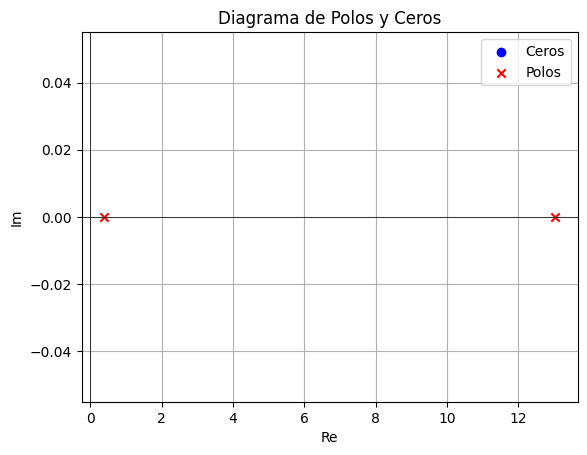

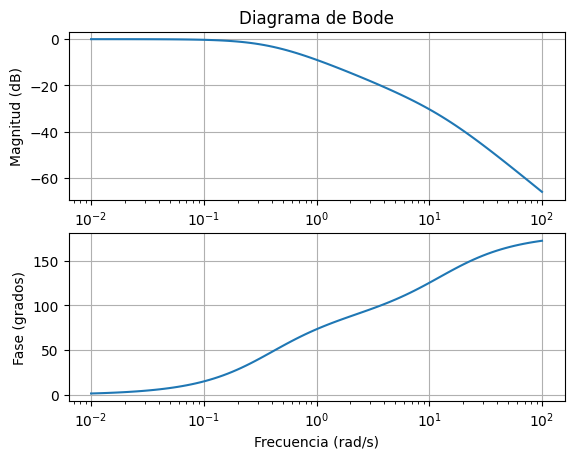

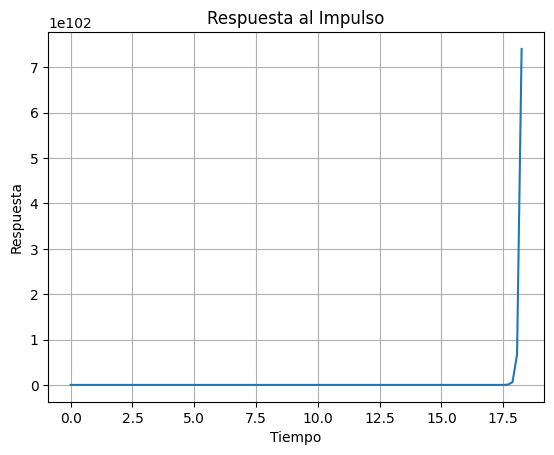

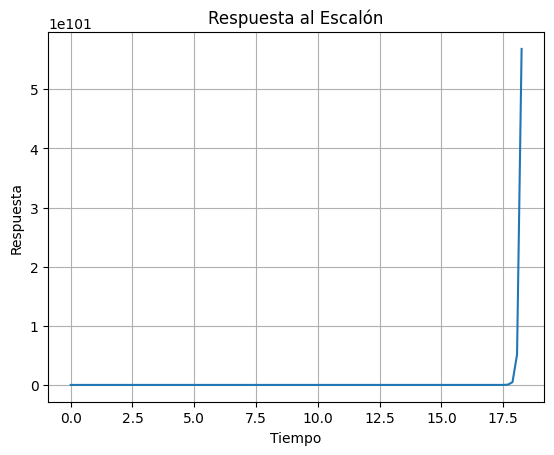

In [ ]:
import numpy as np
import sympy as sym
from scipy.signal import tf2zpk, TransferFunction, lti, step, impulse
import matplotlib.pyplot as plt

# Función para calcular los parámetros c y tipo de amortiguamiento
def calcular_parametros(xi, m, k):
    if xi == 0:
        c = 0
        tipo_amortiguamiento = "Oscilatorio"
    else:
        c = 2 * xi * np.sqrt(k * m)

        if xi == 1:
            tipo_amortiguamiento = "Crítico"
        elif xi > 1:
            tipo_amortiguamiento = "Sobreamortiguado"
        elif 0 < xi < 1:
            tipo_amortiguamiento = "Subamortiguado"
        else:
            tipo_amortiguamiento = "Inestable"

    return {
        "c": c,
        "tipo_amortiguamiento": tipo_amortiguamiento
    }

# Función para calcular los polos usando la ecuación ms^2 + cs + k = 0
def calcular_polos(m, c, k):
    return np.roots([m, c, k])

# Función para graficar polos y ceros
def graficar_polos_y_ceros(num, den):
    z, p, k = tf2zpk(num, den)

    plt.figure()
    plt.scatter(np.real(z), np.imag(z), color='blue', label='Ceros', marker='o')
    plt.scatter(np.real(p), np.imag(p), color='red', label='Polos', marker='x')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.title("Diagrama de Polos y Ceros")
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.legend()
    plt.show()

# Función principal para simular
def simulacion():
    try:
        xi = float(input("Ingresa el valor del factor de amortiguamiento (xi): "))
        m = float(input("Ingresa el valor de la masa (m): "))
        k = float(input("Ingresa el valor de la constante del resorte (k): "))

        # Calculamos c y tipo de amortiguamiento
        resultados = calcular_parametros(xi, m, k)

        print("\nResultados:")
        print(f"m = {m:.4f}")
        print(f"c = {resultados['c']:.4f}")
        print(f"k = {k:.4f}")
        print(f"R (Resistencia) = {resultados['c']:.4f}")  # Resistencia
        print(f"L (Inductancia) = {m:.4f}")               # Inductancia
        print(f"C (Capacitancia) = {1/k:.4f}")            # Capacitancia
        print(f"Tipo de amortiguamiento: {resultados['tipo_amortiguamiento']}")

        # Calculamos los polos
        polos = calcular_polos(m, resultados['c'], k)
        print(f"Polos del sistema: {polos}")

        # Numerador y denominador de la función de transferencia
        num = [k]  # Numerador (k)
        den = [m, resultados['c'], k]  # Denominador (ms^2 + cs + k)

        # Graficamos polos y ceros
        graficar_polos_y_ceros(num, den)

        # Función de transferencia usando scipy
        tf = TransferFunction(num, den)

        # Diagrama de Bode
        plt.figure()
        w, mag, phase = tf.bode()
        plt.subplot(2, 1, 1)
        plt.semilogx(w, mag)
        plt.title("Diagrama de Bode")
        plt.ylabel("Magnitud (dB)")
        plt.grid()
        plt.subplot(2, 1, 2)
        plt.semilogx(w, phase)
        plt.ylabel("Fase (grados)")
        plt.xlabel("Frecuencia (rad/s)")
        plt.grid()
        plt.show()
        # Respuesta al impulso
        t_impulse, y_impulse = impulse(tf)
        plt.figure()
        plt.plot(t_impulse, y_impulse)
        plt.title("Respuesta al Impulso")
        plt.xlabel("Tiempo")
        plt.ylabel("Respuesta")
        plt.grid()
        plt.show()

        # Respuesta al escalón
        t_step, y_step = step(tf)
        plt.figure()
        plt.plot(t_step, y_step)
        plt.title("Respuesta al Escalón")
        plt.xlabel("Tiempo")
        plt.ylabel("Respuesta")
        plt.grid()
        plt.show()



    except ValueError as e:
        print(f"Error: {e}")

# Ejecutar simulación
simulacion()
